In [1]:
#USING THIS TUTORIAL
#  https://github.com/krikit/syntaxnet/blob/master/syntaxnet.ipynb
import nltk
from IPython.display import Image, display
from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

In [2]:
import os
from nltk.parse import stanford

In [3]:
with open('data/out_defs.txt','r') as f1:
    all_data_texts = f1.readlines()

In [4]:
raw = all_data_texts[105]
#raw = 'For every n let G_n be a group of size n.'
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sents = sent_detector.tokenize(raw)


print('========== SENTENCES ==========')
print('\n'.join(sents))

print('========== TOKENIZED ==========')
tokenized_sents = []
for sent in sents:
    words = nltk.word_tokenize(sent)
    tokenized_sents.append(words)
    print(' '.join(words))

========== SENTENCES ==========
let         be a -bundle on a smooth relative curve .
then the degree class of  is defined to be the congruence class modulo  of the degree of any  on  with .
========== TOKENIZED ==========
let be a -bundle on a smooth relative curve .
then the degree class of is defined to be the congruence class modulo of the degree of any on with .


In [5]:
tagged_sents = []
for tokens in tokenized_sents:
    tagged_pairs = nltk.pos_tag(tokens)
    tagged_sents.append(tagged_pairs)
    print(' '.join(['%s/%s' % (word, tag) for word, tag in tagged_pairs]))


let/NN be/VB a/DT -bundle/NN on/IN a/DT smooth/JJ relative/JJ curve/NN ./.
then/RB the/DT degree/JJ class/NN of/IN is/VBZ defined/VBN to/TO be/VB the/DT congruence/NN class/NN modulo/NN of/IN the/DT degree/NN of/IN any/DT on/IN with/IN ./.


In [6]:
import os
from nltk.parse import stanford
STANFORD_DIR = '/home/luis/Paquetes/stanford-parser-full-2018-02-27/' 
os.environ['STANFORD_PARSER'] = '%s/stanford-parser.jar' % STANFORD_DIR
os.environ['STANFORD_MODELS'] = '%s/stanford-parser-3.9.1-models.jar' % STANFORD_DIR
parser = stanford.StanfordParser(model_path='%s/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' % STANFORD_DIR)
parsed_sents = []
for tree in parser.tagged_parse_sents(tagged_sents):
    tree_sent = '\n'.join([str(_) for _ in tree])
    parsed_sents.append(tree_sent)
    print(tree_sent)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  


(ROOT
  (S
    (VP
      (NN let)
      (VP
        (VB be)
        (NP
          (NP (DT a) (NN -bundle))
          (PP
            (IN on)
            (NP (DT a) (JJ smooth) (JJ relative) (NN curve))))))
    (. .)))
(ROOT
  (S
    (ADVP (RB then))
    (NP (NP (DT the) (JJ degree) (NN class)) (PP (IN of)))
    (VP
      (VBZ is)
      (VP
        (VBN defined)
        (S
          (VP
            (TO to)
            (VP
              (VB be)
              (NP
                (NP (DT the) (NN congruence) (NN class) (NN modulo))
                (PP
                  (IN of)
                  (NP
                    (NP (DT the) (NN degree))
                    (PP
                      (IN of)
                      (NP (NP (DT any)) (PP (IN on) (PP (IN with)))))))))))))
    (. .)))


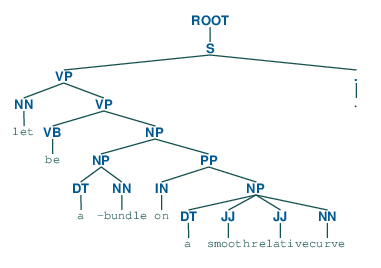

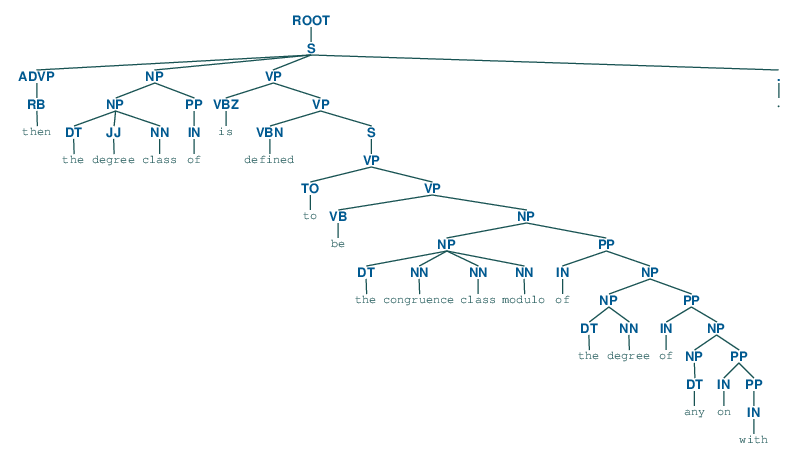

In [8]:
for idx, tree_str in enumerate(parsed_sents):
    cf = CanvasFrame()
    tree = Tree.fromstring(tree_str)
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 13 bold'
    tc['leaf_font'] = 'arial 12'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#175252'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 10, 10)
    cf.print_to_file('tmp.ps')
    cf.destroy()
    os.system('convert tmp.ps tmp.png')    # need install: libpng, ghostscript, imagemagic
    display(Image(filename='tmp.png'))
    os.remove('tmp.ps')
    os.remove('tmp.png')